## Importing Necessary Libraries
These libraries include libraries for reading the dataframe, creating visualizations, performing predictions using different Machine Learning Classifiers as well as performance evaluation metrics. 

In [1]:
# for visualisations
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# for modelling (classifiers)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# for handling imbalanced data
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTEENN

# for evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from scipy.stats import randint 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

## Reading the Dataset 
This dataset that is being read is the transformed dataset derived from the previous notebook where different cleaning techniques were applied. 

In [2]:
#read the dataset 
df = pd.read_csv("C:/Users/Nicole Aragones/Downloads/heart_2020_transformed.csv")
df

,Unnamed: 0,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288491,301710,No,23.38,No,No,No,0.0,0.0,No,Female,60-64,Hispanic,No,Yes,Excellent,6.0,No,No,No
288492,301711,No,22.22,No,No,No,0.0,0.0,No,Female,18-24,Hispanic,No,Yes,Excellent,8.0,No,No,No
288493,301712,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
288494,301713,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No


In [3]:
del df['Unnamed: 0']

In [4]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288491,No,23.38,No,No,No,0.0,0.0,No,Female,60-64,Hispanic,No,Yes,Excellent,6.0,No,No,No
288492,No,22.22,No,No,No,0.0,0.0,No,Female,18-24,Hispanic,No,Yes,Excellent,8.0,No,No,No
288493,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
288494,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No


### Conducting One-Hot Encoding to categorical columns
Columns that are affected: 
1. HeartDisease
2. Smoking 
3. AlcoholDrinking   
4. Stroke           
5. DiffWalking       
6. Sex               
7. AgeCategory  
8. Race            
9. Diabetic         
10. PhysicalActivity  
11. GenHealth        
12. Asthma           
13. KidneyDisease     
14. SkinCancer     

In [5]:
cat_cols = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']

# conducting one hot encoding to all categorical columns 
encoded_df = pd.get_dummies(df, columns = cat_cols)
encoded_df

,BMI,PhysicalHealth,MentalHealth,Diabetic,SleepTime,HeartDisease_No,HeartDisease_Yes,Smoking_No,Smoking_Yes,AlcoholDrinking_No,...,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes
0,16.60,3.0,30.0,Yes,5.0,1,0,0,1,1,...,0,0,0,1,0,1,1,0,0,1
1,20.34,0.0,0.0,No,7.0,1,0,1,0,1,...,0,0,0,1,1,0,1,0,1,0
2,26.58,20.0,30.0,Yes,8.0,1,0,0,1,1,...,1,0,0,0,0,1,1,0,1,0
3,24.21,0.0,0.0,No,6.0,1,0,1,0,1,...,0,1,0,0,1,0,1,0,0,1
4,23.71,28.0,0.0,No,8.0,1,0,1,0,1,...,0,0,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288491,23.38,0.0,0.0,No,6.0,1,0,1,0,1,...,0,0,0,0,1,0,1,0,1,0
288492,22.22,0.0,0.0,No,8.0,1,0,1,0,1,...,0,0,0,0,1,0,1,0,1,0
288493,27.41,7.0,0.0,Yes,6.0,0,1,0,1,1,...,1,0,0,0,0,1,1,0,1,0
288494,29.84,0.0,0.0,No,5.0,1,0,0,1,1,...,0,0,0,1,0,1,1,0,1,0


### Rearranging the format of the dataframe 
In order to prepare the dataframe to be in the correct format when doing modelling and prediction, i shifted the target variable column such that it is the first column in the dataframe. 

In [6]:
#Specifying the target column 
target_column_name = 'Diabetic'

#Placing the target column as the first column in the dataframe 
if target_column_name in encoded_df.columns: 
    df = encoded_df[[target_column_name] + [col for col in encoded_df.columns if col != target_column_name]]

df

,Diabetic,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDisease_No,HeartDisease_Yes,Smoking_No,Smoking_Yes,AlcoholDrinking_No,...,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes
0,Yes,16.60,3.0,30.0,5.0,1,0,0,1,1,...,0,0,0,1,0,1,1,0,0,1
1,No,20.34,0.0,0.0,7.0,1,0,1,0,1,...,0,0,0,1,1,0,1,0,1,0
2,Yes,26.58,20.0,30.0,8.0,1,0,0,1,1,...,1,0,0,0,0,1,1,0,1,0
3,No,24.21,0.0,0.0,6.0,1,0,1,0,1,...,0,1,0,0,1,0,1,0,0,1
4,No,23.71,28.0,0.0,8.0,1,0,1,0,1,...,0,0,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288491,No,23.38,0.0,0.0,6.0,1,0,1,0,1,...,0,0,0,0,1,0,1,0,1,0
288492,No,22.22,0.0,0.0,8.0,1,0,1,0,1,...,0,0,0,0,1,0,1,0,1,0
288493,Yes,27.41,7.0,0.0,6.0,0,1,0,1,1,...,1,0,0,0,0,1,1,0,1,0
288494,No,29.84,0.0,0.0,5.0,1,0,0,1,1,...,0,0,0,1,0,1,1,0,1,0


In [7]:
#Replace the values of the column as 0 and 1 for the target column 
df['Diabetic'].replace('No', '0', inplace = True)
df['Diabetic'].replace('Yes', '1', inplace = True)

df

C:\Users\Nicole Aragones\AppData\Local\Temp\ipykernel_12936\286223904.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Diabetic'].replace('No', '0', inplace = True)
C:\Users\Nicole Aragones\AppData\Local\Temp\ipykernel_12936\286223904.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Diabetic'].replace('Yes', '1', inplace = True)


,Diabetic,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDisease_No,HeartDisease_Yes,Smoking_No,Smoking_Yes,AlcoholDrinking_No,...,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes
0,1,16.60,3.0,30.0,5.0,1,0,0,1,1,...,0,0,0,1,0,1,1,0,0,1
1,0,20.34,0.0,0.0,7.0,1,0,1,0,1,...,0,0,0,1,1,0,1,0,1,0
2,1,26.58,20.0,30.0,8.0,1,0,0,1,1,...,1,0,0,0,0,1,1,0,1,0
3,0,24.21,0.0,0.0,6.0,1,0,1,0,1,...,0,1,0,0,1,0,1,0,0,1
4,0,23.71,28.0,0.0,8.0,1,0,1,0,1,...,0,0,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288491,0,23.38,0.0,0.0,6.0,1,0,1,0,1,...,0,0,0,0,1,0,1,0,1,0
288492,0,22.22,0.0,0.0,8.0,1,0,1,0,1,...,0,0,0,0,1,0,1,0,1,0
288493,1,27.41,7.0,0.0,6.0,0,1,0,1,1,...,1,0,0,0,0,1,1,0,1,0
288494,0,29.84,0.0,0.0,5.0,1,0,0,1,1,...,0,0,0,1,0,1,1,0,1,0


## Model Development
<b>Version 1</b> Configurations: 
- inclusive of other target variables 
1. No Feature Selection (Conducting Feature Importance) 
2. No Balancing of Data 
3. No Hyperparameter Tuning 

--------------
General Steps:
*Make sure conduct one-hot encoding to the categorical columns* 
1. Separating x and y column values
2. Splitting the training and testing dataset  
3. Modelling - finding the best model out of all the models
4. Evaluation - using different evaluation metrics to evaluate the performance of the models used. 

### 1. Defining the x and y values based on the dataset 

In [8]:
# Put into a variable "x" all the values in all but the column "diabetic". 
# Put into a variable "y" the target column "Diabetic"
# Print out the first 5 rows and shapes of both x and y. 

x = df.drop('Diabetic', axis=1)
y = df[['Diabetic']]
print(x.head())
print("\n\n")
print(y.head())
print()
print(x.shape)
print(y.shape)

     BMI  PhysicalHealth  MentalHealth  SleepTime  HeartDisease_No  \
0  16.60             3.0          30.0        5.0                1   
1  20.34             0.0           0.0        7.0                1   
2  26.58            20.0          30.0        8.0                1   
3  24.21             0.0           0.0        6.0                1   
4  23.71            28.0           0.0        8.0                1   

   HeartDisease_Yes  Smoking_No  Smoking_Yes  AlcoholDrinking_No  \
0                 0           0            1                   1   
1                 0           1            0                   1   
2                 0           0            1                   1   
3                 0           1            0                   1   
4                 0           1            0                   1   

   AlcoholDrinking_Yes  ...  GenHealth_Fair  GenHealth_Good  GenHealth_Poor  \
0                    0  ...               0               0               0   
1           

### 2. Splitting Dataset into training and testing data
Validation split helps to improve the model performance by fine-tuning the model after each epoch.<br><br>
<b>Training Dataset (80%):</b> <br>a portion of our actual dataset that is fed into the machine learning model to discover and learn patterns.It trains the model using the actual data.<br><br>
<b>Testing Dataset (20%):</b> <br>it is unseen data that is used to evaluate the performance and progress of the algorithms’ training and adjust or optimize it for improved results.

In [9]:
df = df.reindex(columns = [col for col in df.columns if col != 'Diabetic'] + ['Diabetic'])
df

,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDisease_No,HeartDisease_Yes,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,...,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes,Diabetic
0,16.60,3.0,30.0,5.0,1,0,0,1,1,0,...,0,0,1,0,1,1,0,0,1,1
1,20.34,0.0,0.0,7.0,1,0,1,0,1,0,...,0,0,1,1,0,1,0,1,0,0
2,26.58,20.0,30.0,8.0,1,0,0,1,1,0,...,0,0,0,0,1,1,0,1,0,1
3,24.21,0.0,0.0,6.0,1,0,1,0,1,0,...,1,0,0,1,0,1,0,0,1,0
4,23.71,28.0,0.0,8.0,1,0,1,0,1,0,...,0,0,1,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288491,23.38,0.0,0.0,6.0,1,0,1,0,1,0,...,0,0,0,1,0,1,0,1,0,0
288492,22.22,0.0,0.0,8.0,1,0,1,0,1,0,...,0,0,0,1,0,1,0,1,0,0
288493,27.41,7.0,0.0,6.0,0,1,0,1,1,0,...,0,0,0,0,1,1,0,1,0,1
288494,29.84,0.0,0.0,5.0,1,0,0,1,1,0,...,0,0,1,0,1,1,0,1,0,0


In [10]:
x = df.drop(["Diabetic"], axis = 1)
y = df["Diabetic"]
y.value_counts()

0    249204
1     39292
Name: Diabetic, dtype: int64

In [11]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size = 0.2, 
    stratify = df.Diabetic, random_state=123)

In [12]:
y_train.head()

34363     1
219649    0
10026     0
275351    0
225402    0
Name: Diabetic, dtype: object

0    199363
1     31433
Name: Diabetic, dtype: int64


<AxesSubplot:ylabel='Diabetic'>

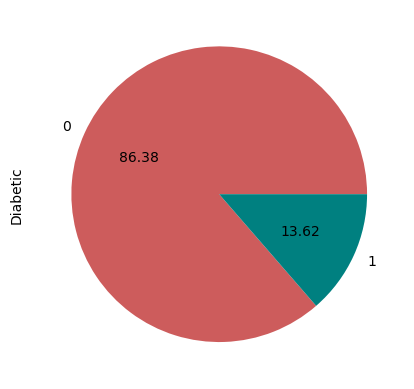

In [13]:
print(y_train.value_counts())
df['Diabetic'].value_counts().plot.pie(autopct = '%.2f', labels =["0", "1"], colors=["indianred", "teal"])

### Displaying the sizes and dimensions of the Training and Testing Dataset

In [14]:
print("The size of original dataset:", x.shape)
print("The size of original dataset:", x_train.shape) 
print("The size of original dataset:", x_test.shape) 

The size of original dataset: (288496, 48)
The size of original dataset: (230796, 48)
The size of original dataset: (57700, 48)


In [15]:
print("The size of original dataset:", y.shape)
print("The size of original dataset:", y_train.shape) 
print("The size of original dataset:", y_test.shape) 

The size of original dataset: (288496,)
The size of original dataset: (230796,)
The size of original dataset: (57700,)


### 3. Modelling using various classifiers 
Classifiers being used: 
1. Logistic Regression (LR)
2. K-Nearest Neighbor (KNN)
3. Decision Tree (DT)
4. Random Forest (RF) 
5. GradientBoostingClassifier (GB)

#### Logistic Regression

              precision    recall  f1-score   support

           0       0.88      0.99      0.93     49841
           1       0.56      0.11      0.18      7859

    accuracy                           0.87     57700
   macro avg       0.72      0.55      0.55     57700
weighted avg       0.83      0.87      0.83     57700

Accuracy Score: 0.8670710571923743
Sensitivity: 0.562624254473161
Specificity: 0.8752469256642523


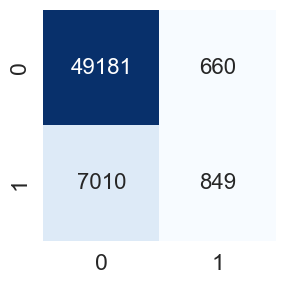

In [16]:
#building a logisticregression classifier 
lr_classifier = LogisticRegression(solver='liblinear',random_state = 123)
lr_classifier.fit(x_train, y_train)

# classification report
print(classification_report(y_test, lr_classifier.predict(x_test)))

# accuracy score
lr_y_pred = lr_classifier.predict(x_test)
print("Accuracy Score: " + str(accuracy_score(y_test, lr_y_pred)))

# Function to create a confusion matrix 
def conf_matrix(y_test, pred_test):    

    # Creating a confusion matrix
    con_mat = confusion_matrix(y_test, pred_test)
    con_mat = pd.DataFrame(con_mat, range(2), range(2))
    
    # Calculate true positive, true negative, false positive, false negative
    TP = con_mat[1][1]
    TN = con_mat[0][0]
    FP = con_mat[0][1]
    FN = con_mat[1][0]

    # Calculate sensitivity (True Positive Rate or Recall)
    sensitivity = TP / (TP + FN)

    # Calculate specificity (True Negative Rate)
    specificity = TN / (TN + FP)

    # Print sensitivity and specificity
    print("Sensitivity:", sensitivity)
    print("Specificity:", specificity)

    #Ploting the confusion matrix
    plt.figure(figsize=(3,3))
    sns.set(font_scale=1.5) 
    sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)
    
#Ploting the confusion matrix
conf_matrix(y_test, lr_y_pred)

#### K-Nearest Neighbor

In [17]:
#building knearestneighbor classifier 
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(x_train, y_train)

# classification report
print(classification_report(y_test, knn_classifier.predict(x_test)))

# accuracy score
knn_y_pred = knn_classifier.predict(x_test)
print("Accuracy Score: " + str(accuracy_score(y_test, knn_y_pred)))

#Ploting the confusion matrix
conf_matrix(y_test, knn_y_pred)

#### Decision Tree 

              precision    recall  f1-score   support

           0       0.88      0.87      0.88     49841
           1       0.25      0.27      0.26      7859

    accuracy                           0.79     57700
   macro avg       0.57      0.57      0.57     57700
weighted avg       0.80      0.79      0.79     57700

Accuracy Score: 0.787209705372617
Sensitivity: 0.2470520892959359
Specificity: 0.8835698968651078


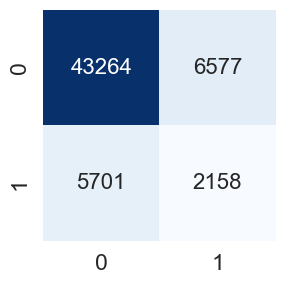

In [18]:
#building decisiontree classifier 
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(x_train, y_train)

# classification report
print(classification_report(y_test, dt_classifier.predict(x_test)))

# accuracy score
dt_y_pred = dt_classifier.predict(x_test)
print("Accuracy Score: " + str(accuracy_score(y_test, dt_y_pred)))

#Ploting the confusion matrix
conf_matrix(y_test, dt_y_pred)

#### Random Forest 

              precision    recall  f1-score   support

           0       0.88      0.96      0.91     49841
           1       0.34      0.14      0.20      7859

    accuracy                           0.85     57700
   macro avg       0.61      0.55      0.56     57700
weighted avg       0.80      0.85      0.82     57700

Accuracy Score: 0.845528596187175
Sensitivity: 0.34078549848942596
Specificity: 0.8762456333884905


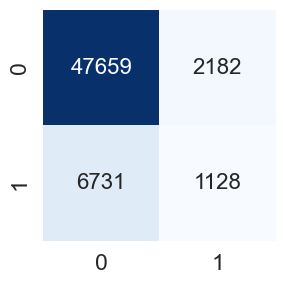

In [19]:
#building randomforest classifier 
rf_classifier = RandomForestClassifier(n_estimators=10)
rf_classifier.fit(x_train, y_train)

# classification report
print(classification_report(y_test, rf_classifier.predict(x_test)))

# accuracy score
rf_y_pred = rf_classifier.predict(x_test)
print("Accuracy Score: " + str(accuracy_score(y_test, rf_y_pred)))

#Ploting the confusion matrix
conf_matrix(y_test, rf_y_pred)

#### Gradient Boosting

              precision    recall  f1-score   support

           0       0.87      0.99      0.93     49841
           1       0.59      0.09      0.16      7859

    accuracy                           0.87     57700
   macro avg       0.73      0.54      0.54     57700
weighted avg       0.83      0.87      0.82     57700

Accuracy Score: 0.8675563258232236
Sensitivity: 0.5864541832669322
Specificity: 0.8738063601736203


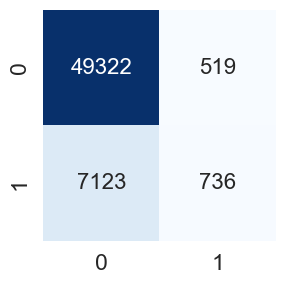

In [20]:
#building gradientboosting classifier 
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(x_train, y_train)

# classification report
print(classification_report(y_test, gb_classifier.predict(x_test)))

# accuracy score
gb_y_pred = gb_classifier.predict(x_test)
print("Accuracy Score: " + str(accuracy_score(y_test, gb_y_pred)))

#Ploting the confusion matrix
conf_matrix(y_test, gb_y_pred)

## Model Development 
<b>Version 2 </b> Configurations:
- without other target variables (HeartDisease, SkinCancer and Stroke)
1. No Feature Selection 
2. No Balancing of Data 
3. No Hyperparameter Tuning 

### Removing the other target columns (used by other members)

In [21]:
excluded_columns = ['HeartDisease_No', 'HeartDisease_Yes', 'SkinCancer_No', 'SkinCancer_Yes', 'Stroke_No', 'Stroke_Yes']

duplicated_df = df.drop(columns=excluded_columns).copy()
duplicated_df

,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,DiffWalking_No,DiffWalking_Yes,...,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,Diabetic
0,16.60,3.0,30.0,5.0,0,1,1,0,1,0,...,0,0,0,0,1,0,1,1,0,1
1,20.34,0.0,0.0,7.0,1,0,1,0,1,0,...,0,0,0,0,1,1,0,1,0,0
2,26.58,20.0,30.0,8.0,0,1,1,0,1,0,...,0,1,0,0,0,0,1,1,0,1
3,24.21,0.0,0.0,6.0,1,0,1,0,1,0,...,0,0,1,0,0,1,0,1,0,0
4,23.71,28.0,0.0,8.0,1,0,1,0,0,1,...,0,0,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288491,23.38,0.0,0.0,6.0,1,0,1,0,1,0,...,1,0,0,0,0,1,0,1,0,0
288492,22.22,0.0,0.0,8.0,1,0,1,0,1,0,...,1,0,0,0,0,1,0,1,0,0
288493,27.41,7.0,0.0,6.0,0,1,1,0,0,1,...,0,1,0,0,0,0,1,1,0,1
288494,29.84,0.0,0.0,5.0,0,1,1,0,1,0,...,0,0,0,0,1,0,1,1,0,0


In [22]:
# Put into a variable "x" all the values in all but the column "diabetic". 
# Put into a variable "y" the target column "Diabetic"
# Print out the first 5 rows and shapes of both x and y. 

x2 = duplicated_df.drop('Diabetic', axis=1)
y2 = duplicated_df[['Diabetic']]
print(x2.head())
print("\n\n")
print(y2.head())
print()
print(x2.shape)
print(y2.shape)

     BMI  PhysicalHealth  MentalHealth  SleepTime  Smoking_No  Smoking_Yes  \
0  16.60             3.0          30.0        5.0           0            1   
1  20.34             0.0           0.0        7.0           1            0   
2  26.58            20.0          30.0        8.0           0            1   
3  24.21             0.0           0.0        6.0           1            0   
4  23.71            28.0           0.0        8.0           1            0   

   AlcoholDrinking_No  AlcoholDrinking_Yes  DiffWalking_No  DiffWalking_Yes  \
0                   1                    0               1                0   
1                   1                    0               1                0   
2                   1                    0               1                0   
3                   1                    0               1                0   
4                   1                    0               0                1   

   ...  PhysicalActivity_Yes  GenHealth_Excellent  GenHe

In [23]:
duplicated_df = duplicated_df.reindex(columns = [col for col in duplicated_df.columns if col != 'Diabetic'] + ['Diabetic'])
duplicated_df

,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,DiffWalking_No,DiffWalking_Yes,...,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,Diabetic
0,16.60,3.0,30.0,5.0,0,1,1,0,1,0,...,0,0,0,0,1,0,1,1,0,1
1,20.34,0.0,0.0,7.0,1,0,1,0,1,0,...,0,0,0,0,1,1,0,1,0,0
2,26.58,20.0,30.0,8.0,0,1,1,0,1,0,...,0,1,0,0,0,0,1,1,0,1
3,24.21,0.0,0.0,6.0,1,0,1,0,1,0,...,0,0,1,0,0,1,0,1,0,0
4,23.71,28.0,0.0,8.0,1,0,1,0,0,1,...,0,0,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288491,23.38,0.0,0.0,6.0,1,0,1,0,1,0,...,1,0,0,0,0,1,0,1,0,0
288492,22.22,0.0,0.0,8.0,1,0,1,0,1,0,...,1,0,0,0,0,1,0,1,0,0
288493,27.41,7.0,0.0,6.0,0,1,1,0,0,1,...,0,1,0,0,0,0,1,1,0,1
288494,29.84,0.0,0.0,5.0,0,1,1,0,1,0,...,0,0,0,0,1,0,1,1,0,0


In [24]:
x2 = duplicated_df.drop(["Diabetic"], axis = 1)
y2 = duplicated_df["Diabetic"]
y2.value_counts()

0    249204
1     39292
Name: Diabetic, dtype: int64

In [25]:
x2_train, x2_test, y2_train, y2_test = train_test_split(
    x2, y2, test_size = 0.2, 
    stratify = duplicated_df.Diabetic, random_state=123)

#### Modelling excluding the other target variables within its features

#### Logistic Regression v2

              precision    recall  f1-score   support

           0       0.87      0.99      0.93     49841
           1       0.55      0.09      0.16      7859

    accuracy                           0.87     57700
   macro avg       0.71      0.54      0.54     57700
weighted avg       0.83      0.87      0.82     57700

Accuracy Score: 0.8661005199306759
Sensitivity: 0.5513513513513514
Specificity: 0.873326832727595


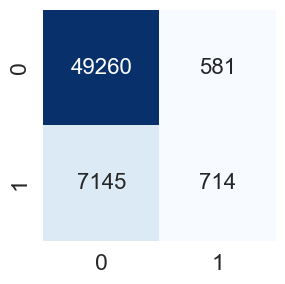

In [26]:
#building a logisticregression classifier 
lr_classifier_v2 = LogisticRegression(solver='liblinear',random_state = 123)
lr_classifier_v2.fit(x2_train, y2_train)

# classification report
print(classification_report(y2_test, lr_classifier_v2.predict(x2_test)))

# accuracy score
lr_y_pred_v2 = lr_classifier_v2.predict(x2_test)
print("Accuracy Score: " + str(accuracy_score(y2_test, lr_y_pred_v2)))

#Ploting the confusion matrix
conf_matrix(y2_test, lr_y_pred_v2)

#### K-Nearest Neighbor v2

In [27]:
#building knearestneighbor classifier 
knn_classifier_v2 = KNeighborsClassifier()
knn_classifier_v2.fit(x2_train, y2_train)

# classification report
print(classification_report(y2_test, knn_classifier_v2.predict(x2_test)))

# accuracy score
knn_y_pred_v2 = knn_classifier_v2.predict(x2_test)
print("Accuracy Score: " + str(accuracy_score(y2_test, knn_y_pred_v2)))

#Ploting the confusion matrix
conf_matrix(y2_test, knn_y_pred_v2)

#### Decision Tree v2

              precision    recall  f1-score   support

           0       0.88      0.87      0.88     49841
           1       0.25      0.27      0.26      7859

    accuracy                           0.79     57700
   macro avg       0.57      0.57      0.57     57700
weighted avg       0.80      0.79      0.79     57700

Accuracy Score: 0.7923396880415945
Sensitivity: 0.25320244223632227
Specificity: 0.883599813565161


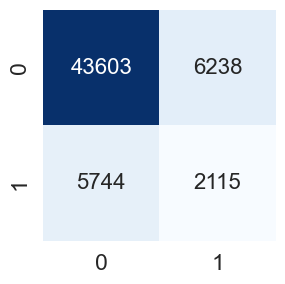

In [28]:
#building decisiontree classifier 
dt_classifier_v2 = DecisionTreeClassifier()
dt_classifier_v2.fit(x2_train, y2_train)

# classification report
print(classification_report(y2_test, dt_classifier_v2.predict(x2_test)))

# accuracy score
dt_y_pred_v2 = dt_classifier_v2.predict(x2_test)
print("Accuracy Score: " + str(accuracy_score(y2_test, dt_y_pred_v2)))

#Ploting the confusion matrix
conf_matrix(y2_test, dt_y_pred_v2)

#### Random Forest v2

              precision    recall  f1-score   support

           0       0.88      0.95      0.91     49841
           1       0.33      0.15      0.20      7859

    accuracy                           0.84     57700
   macro avg       0.60      0.55      0.56     57700
weighted avg       0.80      0.84      0.82     57700

Accuracy Score: 0.8422357019064125
Sensitivity: 0.3258678611422172
Specificity: 0.8763117055867573


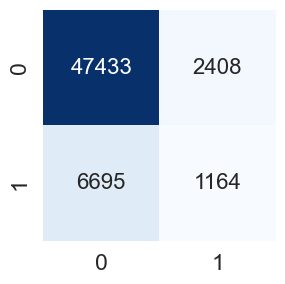

In [29]:
#building randomforest classifier 
rf_classifier_v2 = RandomForestClassifier(n_estimators=10)
rf_classifier_v2.fit(x2_train, y2_train)

# classification report
print(classification_report(y2_test, rf_classifier_v2.predict(x2_test)))

# accuracy score
rf_y_pred_v2 = rf_classifier_v2.predict(x2_test)
print("Accuracy Score: " + str(accuracy_score(y2_test, rf_y_pred_v2)))

#Ploting the confusion matrix
conf_matrix(y2_test, rf_y_pred_v2)

#### Gradient Boosting v2

              precision    recall  f1-score   support

           0       0.87      0.99      0.93     49841
           1       0.59      0.08      0.14      7859

    accuracy                           0.87     57700
   macro avg       0.73      0.53      0.53     57700
weighted avg       0.83      0.87      0.82     57700

Accuracy Score: 0.8669844020797227
Sensitivity: 0.5894941634241245
Specificity: 0.8720179277244494


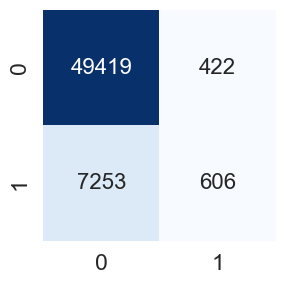

In [30]:
#building gradientboosting classifier 
gb_classifier_v2 = GradientBoostingClassifier()
gb_classifier_v2.fit(x2_train, y2_train)

# classification report
print(classification_report(y2_test, gb_classifier_v2.predict(x2_test)))

# accuracy score
gb_y_pred_v2 = gb_classifier_v2.predict(x2_test)
print("Accuracy Score: " + str(accuracy_score(y2_test, gb_y_pred_v2)))

#Ploting the confusion matrix
conf_matrix(y2_test, gb_y_pred_v2)

## Model Development 
Continuing from model development version 2 <br><br>
<b>Version 3 </b> Configurations:
- without other target variables 
1. No Feature Selection 
2. <b>Balancing Dataset by Undersampling</b>
3. No Hyperparameter Tuning 

0    199363
1     31433
Name: Diabetic, dtype: int64


<AxesSubplot:ylabel='Diabetic'>

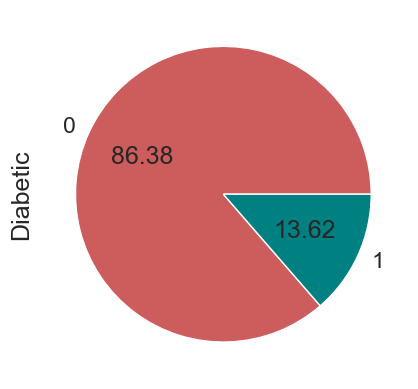

In [31]:
# Portraying the distribution of the classes - hence, it is imbalanced 
print(y2_train.value_counts())
duplicated_df['Diabetic'].value_counts().plot.pie(autopct = '%.2f', labels =["0", "1"], colors=["indianred", "teal"])

### Random Undersampling 
Using the previous version (v2 - without the other target variables within its features), since the ratio of is 87:12 (for classes 0:1 respectively). From this distribution of classes, we can deduce that it is heavily imbalanced and there are a lot that can be done to improve its model. <br> 
In this step, we will try to use the random undersampling method to reduce data from the '0' class. We can change it in such a way that it is 60:40 (for classes 0:1 respectively) and see whether there is a difference in its general performance as a model when it is balanced through random undersampling. 

In [32]:
# Create the RandomUnderSampler with the desired percentages
rus = RandomUnderSampler(sampling_strategy=1)

# Resample the data
x_rus, y_rus = rus.fit_resample(x2_train, y2_train)

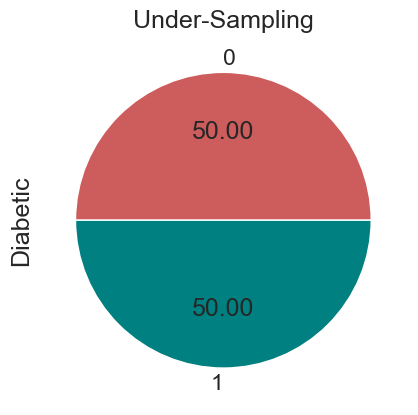

In [33]:
# depicting the balanced data using a pie chart 
ax = y_rus.value_counts().plot.pie(autopct = '%.2f', labels =["0", "1"], colors=["indianred", "teal"])
_ = ax.set_title("Under-Sampling")

#### Modelling with the undersampled data 

#### Logistic Regression v3

              precision    recall  f1-score   support

           0       0.95      0.69      0.80     49841
           1       0.27      0.75      0.40      7859

    accuracy                           0.70     57700
   macro avg       0.61      0.72      0.60     57700
weighted avg       0.85      0.70      0.74     57700

Accuracy Score: 0.8661005199306759
Sensitivity: 0.5513513513513514
Specificity: 0.873326832727595


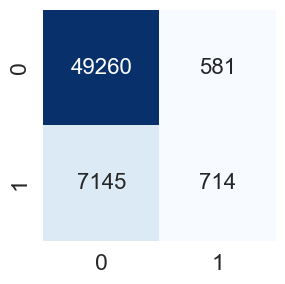

In [34]:
#building a logisticregression classifier 
lr_classifier_v3 = LogisticRegression(solver='liblinear',random_state = 123)
lr_classifier_v3.fit(x_rus, y_rus)

# classification report
print(classification_report(y2_test, lr_classifier_v3.predict(x2_test)))

# accuracy score
lr_y_pred_v3 = lr_classifier_v2.predict(x2_test)
print("Accuracy Score: " + str(accuracy_score(y2_test, lr_y_pred_v3)))

#Ploting the confusion matrix
conf_matrix(y2_test, lr_y_pred_v3)

#### K-Nearest Neighbor v3

In [35]:
#building knearestneighbor classifier 
knn_classifier_v3 = KNeighborsClassifier()
knn_classifier_v3.fit(x_rus, y_rus)

# classification report
print(classification_report(y2_test, knn_classifier_v3.predict(x2_test)))

# accuracy score
knn_y_pred_v3 = knn_classifier_v3.predict(x2_test)
print("Accuracy Score: " + str(accuracy_score(y2_test, knn_y_pred_v3)))

#Ploting the confusion matrix
conf_matrix(y2_test, knn_y_pred_v3)

#### Decision Tree v3

              precision    recall  f1-score   support

           0       0.91      0.63      0.74     49841
           1       0.20      0.61      0.31      7859

    accuracy                           0.62     57700
   macro avg       0.56      0.62      0.52     57700
weighted avg       0.81      0.62      0.68     57700

Accuracy Score: 0.6234662045060658
Sensitivity: 0.2041391081715383
Specificity: 0.9102582810447979


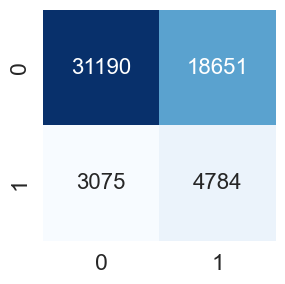

In [36]:
#building decisiontree classifier 
dt_classifier_v3 = DecisionTreeClassifier()
dt_classifier_v3.fit(x_rus, y_rus)

# classification report
print(classification_report(y2_test, dt_classifier_v3.predict(x2_test)))

# accuracy score
dt_y_pred_v3 = dt_classifier_v3.predict(x2_test)
print("Accuracy Score: " + str(accuracy_score(y2_test, dt_y_pred_v3)))

#Ploting the confusion matrix
conf_matrix(y2_test, dt_y_pred_v3)

#### Random Forest v3

              precision    recall  f1-score   support

           0       0.92      0.69      0.79     49841
           1       0.25      0.64      0.36      7859

    accuracy                           0.68     57700
   macro avg       0.59      0.67      0.57     57700
weighted avg       0.83      0.68      0.73     57700

Accuracy Score: 0.6842980935875217
Sensitivity: 0.24678499828859224
Specificity: 0.9245080404843083


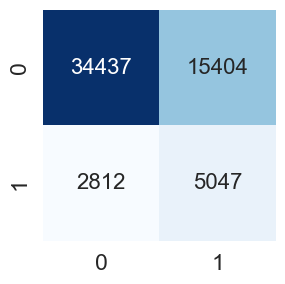

In [37]:
#building randomforest classifier 
rf_classifier_v3 = RandomForestClassifier(n_estimators=10)
rf_classifier_v3.fit(x_rus, y_rus)

# classification report
print(classification_report(y2_test, rf_classifier_v3.predict(x2_test)))

# accuracy score
rf_y_pred_v3 = rf_classifier_v3.predict(x2_test)
print("Accuracy Score: " + str(accuracy_score(y2_test, rf_y_pred_v3)))

#Ploting the confusion matrix
conf_matrix(y2_test, rf_y_pred_v3)

#### Gradient Boosting v3

              precision    recall  f1-score   support

           0       0.95      0.69      0.80     49841
           1       0.27      0.76      0.40      7859

    accuracy                           0.69     57700
   macro avg       0.61      0.72      0.60     57700
weighted avg       0.86      0.69      0.74     57700

Accuracy Score: 0.6948353552859619
Sensitivity: 0.2746937832216316
Specificity: 0.9468737002634133


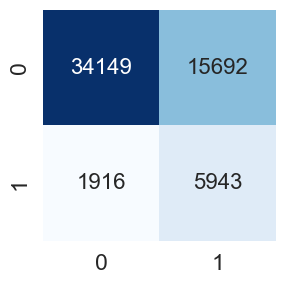

In [38]:
#building gradientboosting classifier 
gb_classifier_v3 = GradientBoostingClassifier()
gb_classifier_v3.fit(x_rus, y_rus)

# classification report
print(classification_report(y2_test, gb_classifier_v3.predict(x2_test)))

# accuracy score
gb_y_pred_v3 = gb_classifier_v3.predict(x2_test)
print("Accuracy Score: " + str(accuracy_score(y2_test, gb_y_pred_v3)))

#Ploting the confusion matrix
conf_matrix(y2_test, gb_y_pred_v3)

## Model Development 
<b>Version 4 </b> Configurations:
- without other target variables 
1. No Feature Selection 
2. <b>Balancing Dataset by Oversampling</b> 
3. No Hyperparameter Tuning 

### Random Oversampling 
Using the previous version (v2 - without the other target variables within its features), since the ratio of is 87:12 (for classes 0:1 respectively). From this distribution of classes, we can deduce that it is heavily imbalanced and there are a lot that can be done to improve its model. <br> 
In this step, we will try to use the random oversampling method to increase data for the '1' class. We can change it in such a way that it is 60:40 (for classes 0:1 respectively) and see whether there is a difference in its general performance as a model when it is balanced through random undersampling. 

In [39]:
# # Create the RandomUnderSampler with the desired percentages
ros = RandomOverSampler(sampling_strategy=1)

# Resample the data
x_ros, y_ros = ros.fit_resample(x2_train, y2_train)

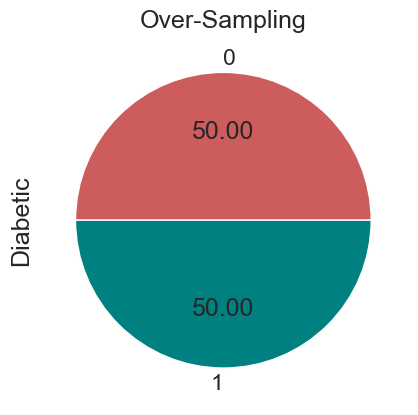

In [40]:
# # depicting the balanced data using a pie chart 
ax = y_ros.value_counts().plot.pie(autopct = '%.2f', labels =["0", "1"], colors=["indianred", "teal"])
_ = ax.set_title("Over-Sampling")


#### Modelling with the oversampled data 

#### Logistic Regression v4

              precision    recall  f1-score   support

           0       0.94      0.69      0.80     49841
           1       0.27      0.74      0.40      7859

    accuracy                           0.70     57700
   macro avg       0.61      0.72      0.60     57700
weighted avg       0.85      0.70      0.74     57700

Accuracy Score: 0.697209705372617
Sensitivity: 0.27449324324324326
Specificity: 0.9447894910410025


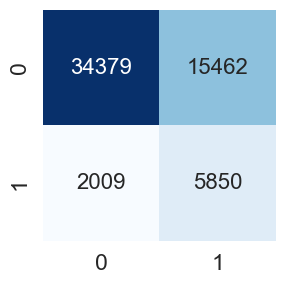

In [41]:
#building a logisticregression classifier 
lr_classifier_v4 = LogisticRegression(solver='liblinear',random_state = 123)
lr_classifier_v4.fit(x_ros, y_ros)

# classification report
print(classification_report(y2_test, lr_classifier_v4.predict(x2_test)))

# accuracy score
lr_y_pred_v4 = lr_classifier_v4.predict(x2_test)
print("Accuracy Score: " + str(accuracy_score(y2_test, lr_y_pred_v4)))

#Ploting the confusion matrix
conf_matrix(y2_test, lr_y_pred_v4)

#### K-Nearest Neighbor v4

In [42]:
#building knearestneighbor classifier 
knn_classifier_v4 = KNeighborsClassifier()
knn_classifier_v4.fit(x_ros, y_ros)

# classification report
print(classification_report(y2_test, knn_classifier_v4.predict(x2_test)))

# accuracy score
knn_y_pred_v4 = knn_classifier_v4.predict(x2_test)
print("Accuracy Score: " + str(accuracy_score(y2_test, knn_y_pred_v4)))

#Ploting the confusion matrix
conf_matrix(y2_test, knn_y_pred_v4)

#### Decision Tree v4

              precision    recall  f1-score   support

           0       0.88      0.87      0.88     49841
           1       0.24      0.25      0.25      7859

    accuracy                           0.79     57700
   macro avg       0.56      0.56      0.56     57700
weighted avg       0.79      0.79      0.79     57700

Accuracy Score: 0.7863431542461006
Sensitivity: 0.23640438834493335
Specificity: 0.8810515409463056


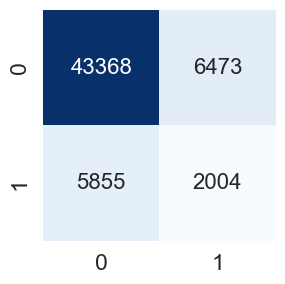

In [43]:
#building decisiontree classifier 
dt_classifier_v4 = DecisionTreeClassifier()
dt_classifier_v4.fit(x_ros, y_ros)

# classification report
print(classification_report(y2_test, dt_classifier_v4.predict(x2_test)))

# accuracy score
dt_y_pred_v4 = dt_classifier_v4.predict(x2_test)
print("Accuracy Score: " + str(accuracy_score(y2_test, dt_y_pred_v4)))

#Ploting the confusion matrix
conf_matrix(y2_test, dt_y_pred_v4)

#### Random Forest v4

              precision    recall  f1-score   support

           0       0.88      0.90      0.89     49841
           1       0.29      0.25      0.27      7859

    accuracy                           0.82     57700
   macro avg       0.59      0.58      0.58     57700
weighted avg       0.80      0.82      0.81     57700

Accuracy Score: 0.8150086655112652
Sensitivity: 0.289075378390529
Specificity: 0.8837870147176985


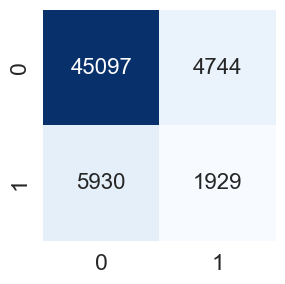

In [44]:
#building randomforest classifier 
rf_classifier_v4 = RandomForestClassifier(n_estimators=10)
rf_classifier_v4.fit(x_ros, y_ros)

# classification report
print(classification_report(y2_test, rf_classifier_v4.predict(x2_test)))

# accuracy score
rf_y_pred_v4 = rf_classifier_v4.predict(x2_test)
print("Accuracy Score: " + str(accuracy_score(y2_test, rf_y_pred_v4)))

#Ploting the confusion matrix
conf_matrix(y2_test, rf_y_pred_v4)

#### Gradient Boosting v4

              precision    recall  f1-score   support

           0       0.95      0.69      0.80     49841
           1       0.27      0.76      0.40      7859

    accuracy                           0.69     57700
   macro avg       0.61      0.72      0.60     57700
weighted avg       0.86      0.69      0.74     57700

Accuracy Score: 0.6948700173310225
Sensitivity: 0.2747816442534313
Specificity: 0.9469509996949613


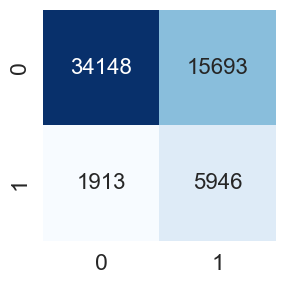

In [45]:
#building gradientboosting classifier 
gb_classifier_v4 = GradientBoostingClassifier()
gb_classifier_v4.fit(x_ros, y_ros)

# classification report
print(classification_report(y2_test, gb_classifier_v4.predict(x2_test)))

# accuracy score
gb_y_pred_v4 = gb_classifier_v4.predict(x2_test)
print("Accuracy Score: " + str(accuracy_score(y2_test, gb_y_pred_v4)))

#Ploting the confusion matrix
conf_matrix(y2_test, gb_y_pred_v4)

## Model Development 
<b>Version 5 </b> Configurations:
- without other target variables 
1. No Feature Selection 
2. <b>Balancing Dataset by Oversampling & Undersampling (by SMOTEENN)</b> 
3. No Hyperparameter Tuning 

### SMOTEENN 
This method applies the SMOTE algorithm to generate synthetic samples for the minority class and then uses the Edited Nearest Neighbors (ENN) method to perform under-sampling. It is useful when dealing with both '0' and '1' classes simultaneously. 

In [46]:
# Assuming you have X_train and y_train containing your features and target labels, respectively
smote_enn = SMOTEENN(sampling_strategy= 'auto')  

x_res, y_res = smote_enn.fit_resample(x2_train, y2_train)

#### Logistic Regression v5

              precision    recall  f1-score   support

           0       0.93      0.79      0.86     49841
           1       0.32      0.60      0.42      7859

    accuracy                           0.77     57700
   macro avg       0.62      0.70      0.64     57700
weighted avg       0.84      0.77      0.80     57700

Accuracy Score: 0.7688388214904679
Sensitivity: 0.31711062153681824
Specificity: 0.9272254862947965


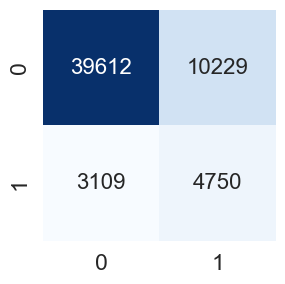

In [47]:
#building a logisticregression classifier 
lr_classifier_v5 = LogisticRegression(solver='liblinear',random_state = 123)
lr_classifier_v5.fit(x_res, y_res)

# classification report
print(classification_report(y2_test, lr_classifier_v5.predict(x2_test)))

# accuracy score
lr_y_pred_v5 = lr_classifier_v5.predict(x2_test)
print("Accuracy Score: " + str(accuracy_score(y2_test, lr_y_pred_v5)))

#Ploting the confusion matrix
conf_matrix(y2_test, lr_y_pred_v5)

#### K-Nearest Neighbor v5

In [48]:
#building knearestneighbor classifier 
knn_classifier_v5 = KNeighborsClassifier()
knn_classifier_v5.fit(x_res, y_res)

# classification report
print(classification_report(y2_test, knn_classifier_v5.predict(x2_test)))

# accuracy score
knn_y_pred_v5 = knn_classifier_v5.predict(x2_test)
print("Accuracy Score: " + str(accuracy_score(y2_test, knn_y_pred_v5)))

#Ploting the confusion matrix
conf_matrix(y2_test, knn_y_pred_v5)

#### Decision Tree v5

              precision    recall  f1-score   support

           0       0.91      0.76      0.83     49841
           1       0.26      0.52      0.34      7859

    accuracy                           0.73     57700
   macro avg       0.58      0.64      0.59     57700
weighted avg       0.82      0.73      0.76     57700

Accuracy Score: 0.7291854419410745
Sensitivity: 0.25564714025042473
Specificity: 0.9092018083096132


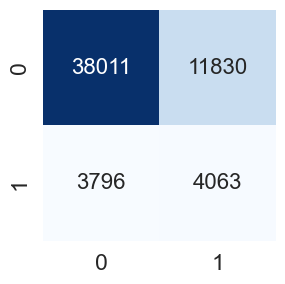

In [49]:
#building decisiontree classifier 
dt_classifier_v5 = DecisionTreeClassifier()
dt_classifier_v5.fit(x_res, y_res)

# classification report
print(classification_report(y2_test, dt_classifier_v5.predict(x2_test)))

# accuracy score
dt_y_pred_v5 = dt_classifier_v5.predict(x2_test)
print("Accuracy Score: " + str(accuracy_score(y2_test, dt_y_pred_v5)))

#Ploting the confusion matrix
conf_matrix(y2_test, dt_y_pred_v5)

#### Random Forest v5

              precision    recall  f1-score   support

           0       0.92      0.80      0.85     49841
           1       0.30      0.55      0.39      7859

    accuracy                           0.76     57700
   macro avg       0.61      0.67      0.62     57700
weighted avg       0.83      0.76      0.79     57700

Accuracy Score: 0.7648006932409012
Sensitivity: 0.3007534533277522
Specificity: 0.9181847530323295


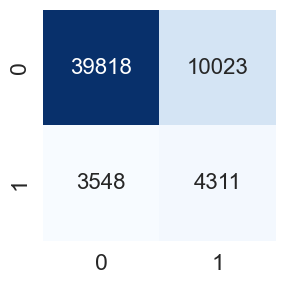

In [50]:
#building randomforest classifier 
rf_classifier_v5 = RandomForestClassifier(n_estimators=10)
rf_classifier_v5.fit(x_res, y_res)

# classification report
print(classification_report(y2_test, rf_classifier_v5.predict(x2_test)))

# accuracy score
rf_y_pred_v5 = rf_classifier_v5.predict(x2_test)
print("Accuracy Score: " + str(accuracy_score(y2_test, rf_y_pred_v5)))

#Ploting the confusion matrix
conf_matrix(y2_test, rf_y_pred_v5)

#### Gradient Boosting v5

              precision    recall  f1-score   support

           0       0.95      0.67      0.79     49841
           1       0.27      0.76      0.40      7859

    accuracy                           0.69     57700
   macro avg       0.61      0.72      0.59     57700
weighted avg       0.85      0.69      0.73     57700

Accuracy Score: 0.6856152512998267
Sensitivity: 0.26885201672737086
Specificity: 0.9469840106031979


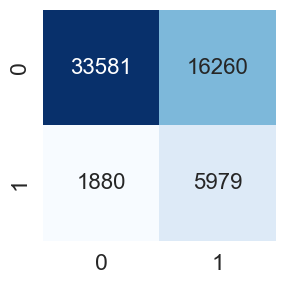

In [51]:
#building gradientboosting classifier 
gb_classifier_v5 = GradientBoostingClassifier()
gb_classifier_v5.fit(x_res, y_res)

# classification report
print(classification_report(y2_test, gb_classifier_v5.predict(x2_test)))

# accuracy score
gb_y_pred_v5 = gb_classifier_v5.predict(x2_test)
print("Accuracy Score: " + str(accuracy_score(y2_test, gb_y_pred_v5)))

#Ploting the confusion matrix
conf_matrix(y2_test, gb_y_pred_v5)

## Model Development 
<b>Version 6 </b> Configurations:
- without other target variables 
1. <b>With Feature Selection </b>
2. <b>Balancing Dataset using Undersample & Oversample</b> - depends which has a better result (using one or both)
3. No Hyperparameter Tuning 

### Feature Extraction 
Feature extraction increases the efficiency and accuracy of learned models by extracting features from the input data. This phase of the general framework reduces the dimensionality of data by removing the redundant data without losing vital information. Feature extraction ensures it only takes in words that have already been cleaned (through the processing that has been done above) 

In [52]:
# Assuming you have your features (x) and target (y) data
x3 = duplicated_df.drop('Diabetic', axis=1)
y3 = duplicated_df[['Diabetic']]

# Create and fit the Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(x3, y3)

# Get the feature coefficients
feature_coefficients = logreg_model.coef_[0]

# Take the absolute value of coefficients to get their magnitudes
feature_importance = abs(feature_coefficients)

# Create a DataFrame to hold the feature names and their respective importance values
feature_importance_df = pd.DataFrame({'Feature': x3.columns, 'Importance': feature_importance})

# Sort the DataFrame in decreasing order of importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Reset the index for better visualization
feature_importance_df = feature_importance_df.reset_index(drop=True)

feature_importance_df

C:\Users\Nicole Aragones\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nicole Aragones\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Feature,Importance
0,AgeCategory_18-24,1.383297
1,AgeCategory_25-29,1.244222
2,GenHealth_Excellent,1.216510
3,AgeCategory_30-34,0.970062
4,AgeCategory_75-79,0.861402
5,AgeCategory_70-74,0.832308
6,AlcoholDrinking_Yes,0.781500
7,KidneyDisease_No,0.744137
8,AgeCategory_35-39,0.737881
9,GenHealth_Poor,0.720241


#### Dimension reduction by only taking in features with the importance of more than 0.1
This step allows us to narrow down to more significantly important features in order to further improve the model's accuracy

In [53]:
#specifying a threshold value of 0.1  
threshold_value = 0.1

#only selecting features that have an importance of 0.1 and above 
selectedFeatures_df = feature_importance_df[feature_importance_df['Importance'] > threshold_value]
selectedFeatures_df

,Feature,Importance
0,AgeCategory_18-24,1.383297
1,AgeCategory_25-29,1.244222
2,GenHealth_Excellent,1.216510
3,AgeCategory_30-34,0.970062
4,AgeCategory_75-79,0.861402
5,AgeCategory_70-74,0.832308
6,AlcoholDrinking_Yes,0.781500
7,KidneyDisease_No,0.744137
8,AgeCategory_35-39,0.737881
9,GenHealth_Poor,0.720241


In [54]:
selectedFeatures = [tuple(row) for row in selectedFeatures_df.to_records(index=False)]
selectedFeatures

[('AgeCategory_18-24', 1.383296594083305),
 ('AgeCategory_25-29', 1.2442215395569323),
 ('GenHealth_Excellent', 1.2165104317610027),
 ('AgeCategory_30-34', 0.9700617925712558),
 ('AgeCategory_75-79', 0.8614015537875631),
 ('AgeCategory_70-74', 0.8323082399672496),
 ('AlcoholDrinking_Yes', 0.7815004594096328),
 ('KidneyDisease_No', 0.7441368121263301),
 ('AgeCategory_35-39', 0.73788066296942),
 ('GenHealth_Poor', 0.720240627676782),
 ('AgeCategory_80 or older', 0.6822363349125652),
 ('GenHealth_Very good', 0.675784272612762),
 ('AgeCategory_65-69', 0.6690372068482592),
 ('DiffWalking_No', 0.5227965045549811),
 ('Race_White', 0.49816389811067785),
 ('AgeCategory_60-64', 0.48418269736255365),
 ('PhysicalActivity_Yes', 0.4718626311744398),
 ('Sex_Female', 0.46469011520949105),
 ('Asthma_No', 0.44306236147133476),
 ('AgeCategory_40-44', 0.42461854433866475),
 ('Smoking_No', 0.42084159925325526),
 ('GenHealth_Fair', 0.4162794361494214),
 ('Smoking_Yes', 0.41616584332386874),
 ('Asthma_Yes', 

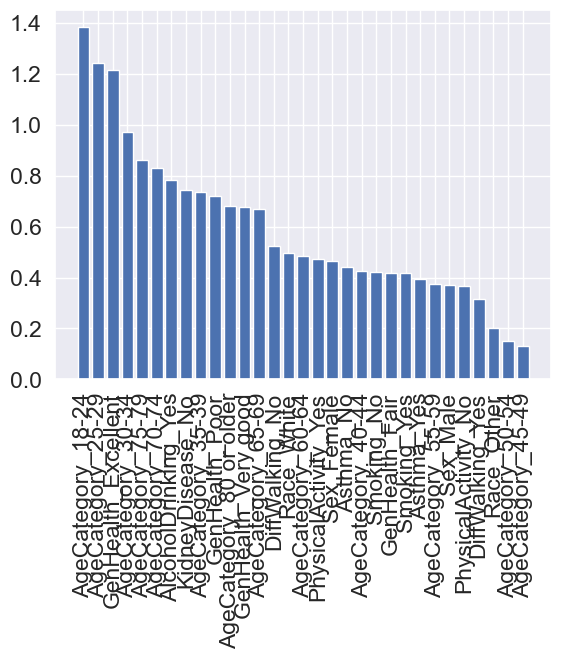

In [55]:
# listing down the selected features and its weight of importance into a listed zip
labels, values = list(zip(*selectedFeatures))

# Plot a bar chart showing the weights vs selected features as contained in selectedFeatures.
import matplotlib.pyplot as plt

# plot
plt.bar(labels,values)
plt.xticks(rotation=90)
plt.show()

In [56]:
# putting the new selected features into a new list 
new_selectedFeatures = []
for item in selectedFeatures: 
    new_selectedFeatures.append(item[0])
new_selectedFeatures

['AgeCategory_18-24',
 'AgeCategory_25-29',
 'GenHealth_Excellent',
 'AgeCategory_30-34',
 'AgeCategory_75-79',
 'AgeCategory_70-74',
 'AlcoholDrinking_Yes',
 'KidneyDisease_No',
 'AgeCategory_35-39',
 'GenHealth_Poor',
 'AgeCategory_80 or older',
 'GenHealth_Very good',
 'AgeCategory_65-69',
 'DiffWalking_No',
 'Race_White',
 'AgeCategory_60-64',
 'PhysicalActivity_Yes',
 'Sex_Female',
 'Asthma_No',
 'AgeCategory_40-44',
 'Smoking_No',
 'GenHealth_Fair',
 'Smoking_Yes',
 'Asthma_Yes',
 'AgeCategory_55-59',
 'Sex_Male',
 'PhysicalActivity_No',
 'DiffWalking_Yes',
 'Race_Other',
 'AgeCategory_50-54',
 'AgeCategory_45-49']

In [57]:
# using the new selected features to be trained in the model 
x3 = duplicated_df[new_selectedFeatures]
y3 = duplicated_df["Diabetic"]
y3.value_counts()

0    249204
1     39292
Name: Diabetic, dtype: int64

In [58]:
x3_train, x3_test, y3_train, y3_test = train_test_split(
    x3, y3, test_size = 0.3, 
    stratify = duplicated_df.Diabetic, random_state=123)

### Conducting Undersampling (based on the best balancing technique)

In [59]:
# Create the RandomUnderSampler with the desired percentages
rus2 = RandomUnderSampler(sampling_strategy=1)

# Resample the data
x_rus2, y_rus2 = rus2.fit_resample(x3_train, y3_train)

#### Modelling with the selected features only 

#### Logistic Regression v6

              precision    recall  f1-score   support

           0       0.94      0.68      0.79     74761
           1       0.26      0.72      0.39     11788

    accuracy                           0.69     86549
   macro avg       0.60      0.70      0.59     86549
weighted avg       0.85      0.69      0.74     86549

Accuracy Score: 0.6883383979017667
Sensitivity: 0.2637964287936291
Specificity: 0.9391945297134349


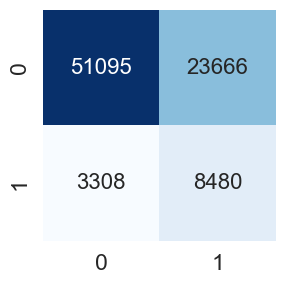

In [60]:
#building a logisticregression classifier 
lr_classifier_v6 = LogisticRegression(solver='liblinear',random_state = 123)
lr_classifier_v6.fit(x_rus2, y_rus2)

# classification report
print(classification_report(y3_test, lr_classifier_v6.predict(x3_test)))

# accuracy score
lr_y_pred_v6 = lr_classifier_v6.predict(x3_test)
print("Accuracy Score: " + str(accuracy_score(y3_test, lr_y_pred_v6)))

#Ploting the confusion matrix
conf_matrix(y3_test, lr_y_pred_v6)

#### K-Nearest Neighbor v6

In [61]:
#building a logisticregression classifier 
knn_classifier_v6 = KNeighborsClassifier()
knn_classifier_v6.fit(x_rus2, y_rus2)

# classification report
print(classification_report(y3_test, knn_classifier_v6.predict(x3_test)))

# accuracy score
knn_y_pred_v6 = knn_classifier_v6.predict(x3_test)
print("Accuracy Score: " + str(accuracy_score(y3_test, knn_y_pred_v6)))

#Ploting the confusion matrix
conf_matrix(y3_test, knn_y_pred_v6)

#### Decision Tree v6

              precision    recall  f1-score   support

           0       0.93      0.67      0.78     74761
           1       0.25      0.69      0.37     11788

    accuracy                           0.68     86549
   macro avg       0.59      0.68      0.58     86549
weighted avg       0.84      0.68      0.73     86549

Accuracy Score: 0.6760678921766861
Sensitivity: 0.2508892432233534
Specificity: 0.9331442238166751


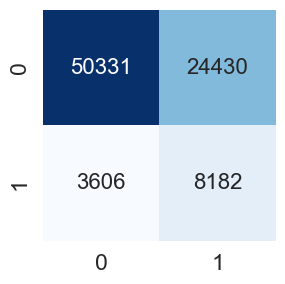

In [62]:
#building a decisiontree classifier 
dt_classifier_v6 = DecisionTreeClassifier()
dt_classifier_v6.fit(x_rus2, y_rus2)

# classification report
print(classification_report(y3_test, dt_classifier_v6.predict(x3_test)))

# accuracy score
dt_y_pred_v6 = dt_classifier_v6.predict(x3_test)
print("Accuracy Score: " + str(accuracy_score(y3_test, dt_y_pred_v6)))

#Ploting the confusion matrix
conf_matrix(y3_test, dt_y_pred_v6)

#### Random Forest v6

              precision    recall  f1-score   support

           0       0.94      0.65      0.77     74761
           1       0.25      0.73      0.37     11788

    accuracy                           0.66     86549
   macro avg       0.59      0.69      0.57     86549
weighted avg       0.84      0.66      0.72     86549

Accuracy Score: 0.663612520075333
Sensitivity: 0.2486654288035279
Specificity: 0.9382308327413068


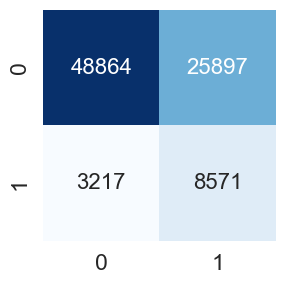

In [63]:
#building randomforest classifier 
rf_classifier_v6 = RandomForestClassifier(n_estimators=10)
rf_classifier_v6.fit(x_rus2, y_rus2)

# classification report
print(classification_report(y3_test, rf_classifier_v6.predict(x3_test)))

# accuracy score
rf_y_pred_v6 = rf_classifier_v6.predict(x3_test)
print("Accuracy Score: " + str(accuracy_score(y3_test, rf_y_pred_v6)))

#Ploting the confusion matrix
conf_matrix(y3_test, rf_y_pred_v6)


#### Gradient Boosting v6

              precision    recall  f1-score   support

           0       0.94      0.67      0.78     74761
           1       0.26      0.74      0.39     11788

    accuracy                           0.68     86549
   macro avg       0.60      0.71      0.58     86549
weighted avg       0.85      0.68      0.73     86549

Accuracy Score: 0.6784364926226761
Sensitivity: 0.261030178449072
Specificity: 0.9428862632592201


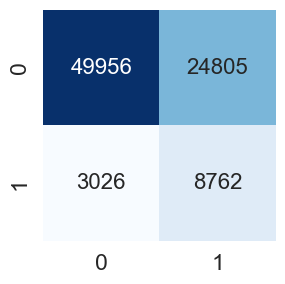

In [64]:
#building gradientboosting classifier 
gb_classifier_v6 = GradientBoostingClassifier()
gb_classifier_v6.fit(x_rus2, y_rus2)

# classification report
print(classification_report(y3_test, gb_classifier_v6.predict(x3_test)))

# accuracy score
gb_y_pred_v6 = gb_classifier_v6.predict(x3_test)
print("Accuracy Score: " + str(accuracy_score(y3_test, gb_y_pred_v6)))

#Ploting the confusion matrix
conf_matrix(y3_test, gb_y_pred_v6)

### Final Evaluation 
Among all the Model Developments that have been conducted, we can deduce that for majority of the developments, the Logistic Regression and Gradient Boosting were the two models that have performed well in predictions. However, when narrowing down to the two models and looking closely at the performance scores and the confusion matrix, we can conclude that Gradient Boosting performs the better than logistic regression hence, being the best model. 

Overall, we can deduce that the best model (Model Development 3) was configured: 
1. without other target variables 
2. no other feature selection
3. Random undersampling balancing technique 

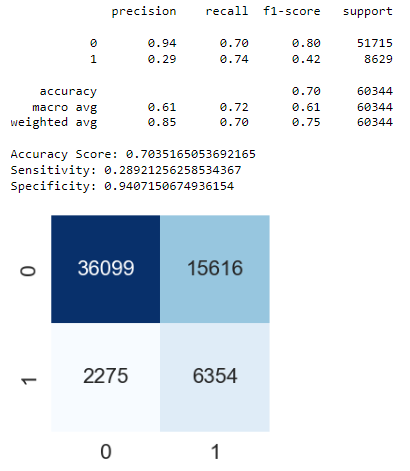

## Model Development 
<b>Version 7 </b> Configurations:
- without other target variables 
1. <b>With Feature Selection </b>
2. <b>Balancing Dataset by Undersampling</b> 
3. <b>With Hyperparameter Tuning </b>

In [65]:
model = GradientBoostingClassifier()

In [66]:
parameters = {'learning_rate' : [0.01,0.02,0.03],
            'subsample' : [0.9,0.5,0.2],
              'n_estimators' : [100,500,1000],
              'max_depth' : [4,6,8]
}

In [67]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(model, param_grid = parameters, cv = 2, n_jobs = -1)
grid.fit(x_rus,y_rus)

GridSearchCV(cv=2, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03],
                         'max_depth': [4, 6, 8],
                         'n_estimators': [100, 500, 1000],
                         'subsample': [0.9, 0.5, 0.2]})

In [68]:
best_params = grid.best_params_
best_estimator = grid.best_estimator_

### Retraining model with tuned parameters

              precision    recall  f1-score   support

           0       0.95      0.69      0.80     49841
           1       0.27      0.76      0.40      7859

    accuracy                           0.69     57700
   macro avg       0.61      0.72      0.60     57700
weighted avg       0.86      0.69      0.74     57700

Accuracy Score: 0.6948353552859619
Sensitivity: 0.2746937832216316
Specificity: 0.9468737002634133


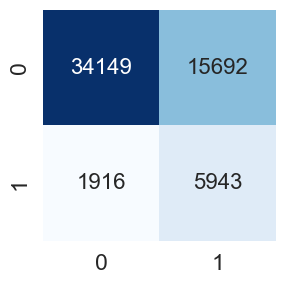

In [69]:
best_model = GradientBoostingClassifier()
best_model.fit(x_rus, y_rus)

# classification report
print(classification_report(y2_test, best_model.predict(x2_test)))

# accuracy score
best_model_pred = best_model.predict(x2_test)
print("Accuracy Score: " + str(accuracy_score(y2_test, best_model_pred)))

#Ploting the confusion matrix
conf_matrix(y2_test, best_model_pred)